# Homework 9: Text Generation, Style Transfer

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Text Generation

### 1. Word Tokenizer

In [2]:
text = """세련되고 예쁜 검정 원피스를 입은 여성\n
반대편에 앉아 후즐근하고 편한 옷을 입은 남성의 모습이 대조된다.\n
여자는 커피 한 잔을 시켰지만, 우유를 시킨 남자는 품에서 시리얼을 꺼내 우유에 말아 먹는다.\n
남자는 여자를 단 한번도 쳐다보지 않은 채 시리얼에만 집중하고, 그런 남자를 여자는 불쾌하고 이상하다는 듯한 시선으로 바라본다\n"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 44


In [4]:
# 각 단어와 단어에 부여된 정수 인덱스 출력
print(tokenizer.word_index)

{'입은': 1, '여자는': 2, '남자는': 3, '세련되고': 4, '예쁜': 5, '검정': 6, '원피스를': 7, '여성': 8, '반대편에': 9, '앉아': 10, '후즐근하고': 11, '편한': 12, '옷을': 13, '남성의': 14, '모습이': 15, '대조된다': 16, '커피': 17, '한': 18, '잔을': 19, '시켰지만': 20, '우유를': 21, '시킨': 22, '품에서': 23, '시리얼을': 24, '꺼내': 25, '우유에': 26, '말아': 27, '먹는다': 28, '여자를': 29, '단': 30, '한번도': 31, '쳐다보지': 32, '않은': 33, '채': 34, '시리얼에만': 35, '집중하고': 36, '그런': 37, '남자를': 38, '불쾌하고': 39, '이상하다는': 40, '듯한': 41, '시선으로': 42, '바라본다': 43}


### 2. Make Train Data

In [5]:
sequences = list()
for line in text.split('\n'): # \n을 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 42


In [6]:
# 전체 샘플 출력
print(sequences)

[[4, 5], [4, 5, 6], [4, 5, 6, 7], [4, 5, 6, 7, 1], [4, 5, 6, 7, 1, 8], [9, 10], [9, 10, 11], [9, 10, 11, 12], [9, 10, 11, 12, 13], [9, 10, 11, 12, 13, 1], [9, 10, 11, 12, 13, 1, 14], [9, 10, 11, 12, 13, 1, 14, 15], [9, 10, 11, 12, 13, 1, 14, 15, 16], [2, 17], [2, 17, 18], [2, 17, 18, 19], [2, 17, 18, 19, 20], [2, 17, 18, 19, 20, 21], [2, 17, 18, 19, 20, 21, 22], [2, 17, 18, 19, 20, 21, 22, 3], [2, 17, 18, 19, 20, 21, 22, 3, 23], [2, 17, 18, 19, 20, 21, 22, 3, 23, 24], [2, 17, 18, 19, 20, 21, 22, 3, 23, 24, 25], [2, 17, 18, 19, 20, 21, 22, 3, 23, 24, 25, 26], [2, 17, 18, 19, 20, 21, 22, 3, 23, 24, 25, 26, 27], [2, 17, 18, 19, 20, 21, 22, 3, 23, 24, 25, 26, 27, 28], [3, 29], [3, 29, 30], [3, 29, 30, 31], [3, 29, 30, 31, 32], [3, 29, 30, 31, 32, 33], [3, 29, 30, 31, 32, 33, 34], [3, 29, 30, 31, 32, 33, 34, 35], [3, 29, 30, 31, 32, 33, 34, 35, 36], [3, 29, 30, 31, 32, 33, 34, 35, 36, 37], [3, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], [3, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 2], [3, 29, 3

In [7]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 17


In [8]:
# 전체 샘플의 길이를 17로 패딩(0으로 빈공간을 채워줌)
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  5  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  5  6  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  5  6  7  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  5  6  7  1  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9 10 11]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9 10 11 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9 10 11 12 13]
 [ 0  0  0  0  0  0  0  0  0  0  0  9 10 11 12 13  1]
 [ 0  0  0  0  0  0  0  0  0  0  9 10 11 12 13  1 14]
 [ 0  0  0  0  0  0  0  0  0  9 10 11 12 13  1 14 15]
 [ 0  0  0  0  0  0  0  0  9 10 11 12 13  1 14 15 16]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 17]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 17 18]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 17 18 19]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 17 18 19 20]
 [ 0  0  0  0  0  0  0  0  0  0  0  2 17 18 19 20 21]
 [ 0  0  0  0  0  0  0  0  0

In [9]:
# 각 샘플의 마지막 단어를 레이블로 분리
sequences = np.array(sequences)
X = sequences[:,:-1] # 데이터
y = sequences[:,-1] # 레이블

In [10]:
# 학습시키기전에 one-hot-encoding 진행
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Text Generation - Experiment with RNN

### Training

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [12]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
2/2 - 1s - loss: 3.7940 - accuracy: 0.0000e+00
Epoch 2/200
2/2 - 0s - loss: 3.7761 - accuracy: 0.0000e+00
Epoch 3/200
2/2 - 0s - loss: 3.7635 - accuracy: 0.0000e+00
Epoch 4/200
2/2 - 0s - loss: 3.7521 - accuracy: 0.0476
Epoch 5/200
2/2 - 0s - loss: 3.7404 - accuracy: 0.0476
Epoch 6/200
2/2 - 0s - loss: 3.7281 - accuracy: 0.0714
Epoch 7/200
2/2 - 0s - loss: 3.7160 - accuracy: 0.1190
Epoch 8/200
2/2 - 0s - loss: 3.7044 - accuracy: 0.1190
Epoch 9/200
2/2 - 0s - loss: 3.6915 - accuracy: 0.1667
Epoch 10/200
2/2 - 0s - loss: 3.6780 - accuracy: 0.1667
Epoch 11/200
2/2 - 0s - loss: 3.6634 - accuracy: 0.1905
Epoch 12/200
2/2 - 0s - loss: 3.6458 - accuracy: 0.1905
Epoch 13/200
2/2 - 0s - loss: 3.6290 - accuracy: 0.1905
Epoch 14/200
2/2 - 0s - loss: 3.6113 - accuracy: 0.1905
Epoch 15/200
2/2 - 0s - loss: 3.5892 - accuracy: 0.1667
Epoch 16/200
2/2 - 0s - loss: 3.5664 - accuracy: 0.1429
Epoch 17/200
2/2 - 0s - loss: 3.5442 - accuracy: 0.1429
Epoch 18/200
2/2 - 0s - loss: 3.5205 - accura

### Testing

In [13]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

## Text Generation Results

### Good Text Generation

In [14]:
print(sentence_generation(model, tokenizer, '반대편에', 7))

반대편에 앉아 후즐근하고 편한 옷을 입은 남성의 모습이


In [15]:
print(sentence_generation(model, tokenizer, '시리얼에만', 6))

시리얼에만 집중하고 시켰지만 남자를 여자는 불쾌하고 이상하다는


### Bad Text Generation

In [16]:
print(sentence_generation(model, tokenizer, '우유를', 6))

우유를 원피스를 입은 여성 옷을 시킨 남자는


In [17]:
print(sentence_generation(model, tokenizer, '남자는', 6))

남자는 시켰지만 단 한번도 쳐다보지 않은 시켰지만


In [18]:
print(sentence_generation(model, tokenizer, '커피', 6))

커피 시켰지만 잔을 시켰지만 우유를 시킨 남자는


# Style Transfer

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [20]:
import tensorflow as tf

In [21]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import time
import functools

In [22]:
content_path = '/Users/lifeofpy/ADL/cat.jpeg' # 고양이 사진
style_path = '/Users/lifeofpy/ADL/명화.jpeg' # 반 고흐의 자화상

In [23]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [24]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

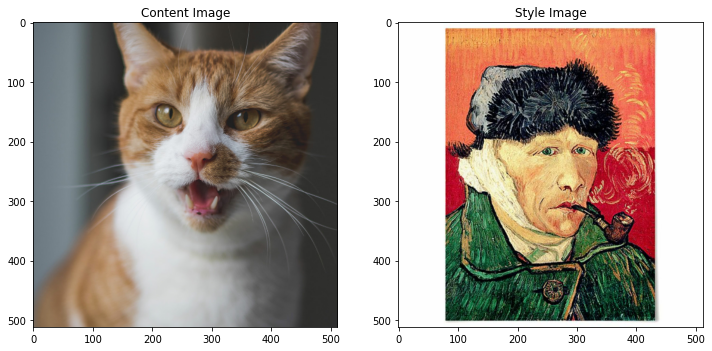

In [25]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image') # 이 이미지에

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image') # 이 스타일을 입혀보자!

### Build a pretrained VGG model with Imagenet

In [26]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
r = vgg(x)

In [27]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

print(imagenet_labels[np.argsort(r)[0,::-1][:5]+1])

['tabby' 'tiger cat' 'Egyptian cat' 'lynx' 'plastic bag']


In [28]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [29]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [30]:
def vgg_layers(layer_names):
  # Creates a vgg model that returns a list of intermediate output values.
  # Load our model. We load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
  
    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [31]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 512, 512, 64)
  min:  0.0
  max:  872.81036
  mean:  36.5849

block2_conv1
  shape:  (1, 256, 256, 128)
  min:  0.0
  max:  4118.2954
  mean:  198.43153

block3_conv1
  shape:  (1, 128, 128, 256)
  min:  0.0
  max:  11305.4
  mean:  183.75807

block4_conv1
  shape:  (1, 64, 64, 512)
  min:  0.0
  max:  17301.11
  mean:  652.571

block5_conv1
  shape:  (1, 32, 32, 512)
  min:  0.0
  max:  2768.0352
  mean:  49.238316



In [32]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [33]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg =  vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                          outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output)
                         for style_output in style_outputs]

        content_dict = {content_name:value 
                        for content_name, value 
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name:value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content':content_dict, 'style':style_dict}

In [34]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()

print("Contents:")
for name, output in sorted(results['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.014102543
    max:  18415.662
    mean:  182.02156

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  27324.152
    mean:  4741.032

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.036650646
    max:  152261.61
    mean:  4337.214

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  1209099.5
    mean:  77510.59

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  53684.73
    mean:  677.46326

Contents:
   block5_conv2
    shape:  (1, 32, 32, 512)
    min:  0.0
    max:  1507.6158
    mean:  9.714823


### Training - Version 1

In [35]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [36]:
image = tf.Variable(content_image)

In [37]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [38]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2)
                        for name in style_outputs.keys()])
    
    style_loss *= style_weight / num_style_layers
    
    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2)
                        for name in content_outputs.keys()])
    
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [39]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [40]:
style_weight = 1e-2
content_weight = 1e4

In [41]:
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)

        grad = tape.gradient(loss, image)
        opt.apply_gradients([(grad, image)])
        image.assign(clip_0_1(image))

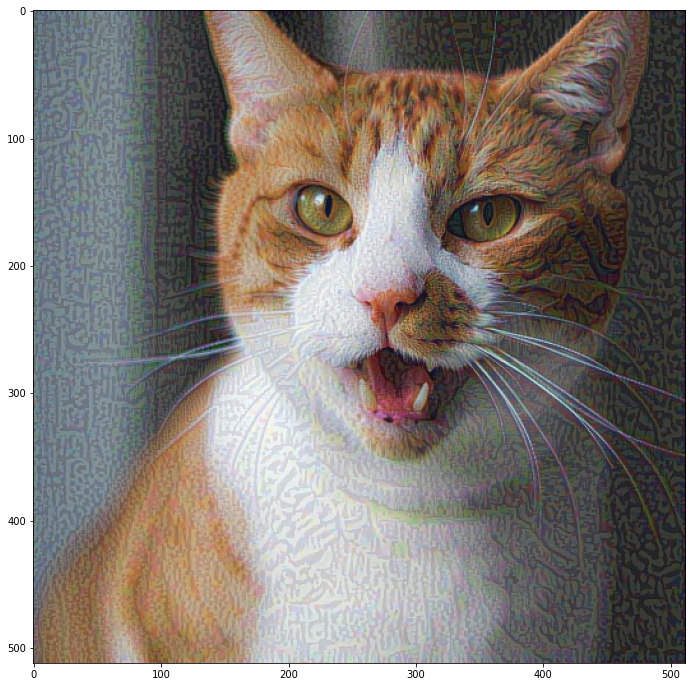

In [42]:
train_step(image)
train_step(image)
train_step(image)
plt.imshow(image.read_value()[0])

### Training - Version 2 & Result

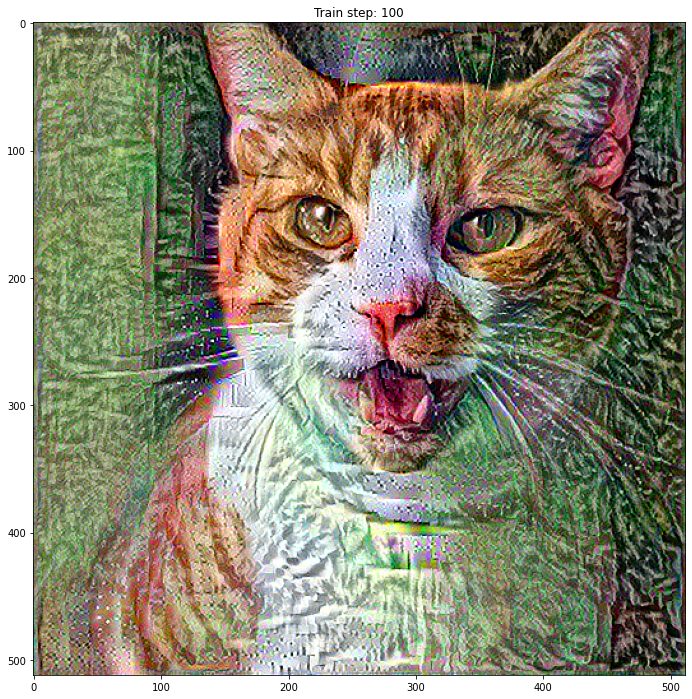

Total time: 308.9


In [43]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 10

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='')
    display.clear_output(wait=True)
    imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

**epoch 을 대폭 늘려 학습시켰을 때, Style Transfer 가 잘 되는 모습을 확인할 수 있다.**